**Задание #4, Вариант #29**

In [1]:
import math
import numpy as np
from tabulate import tabulate
from numpy.linalg import solve
from scipy.special import legendre, sh_legendre

Исходные данные - ядро $K(x, s)$

In [2]:
def K(x,s):
    return np.divide(1, 1+x+s)

$z(s) = 1$ - вычислим u(x) через интеграл ядра от 0 до 1

In [3]:
def u(x):
    return (np.log(x + 2) - np.log(x + 1))

Вычисление узлов для формулы средних прямоугольников:

In [4]:
def build_nodes(N):
    result = []
    for i in range(N):
        result.append(i/N+1/(2*N))
    return result

Вычисление $Aw_k$ по квадратурной формуле средних прямоугольник с $20$ узлами:

In [5]:
def build_Aw_k(polynom_k):
        nodes = build_nodes(20)
        return lambda x: (1/20)*sum(K(x,t)*polynom_k(t) for t in nodes)

Вычисление скалярных произведений по квадратурной формуле средних прямоугольников с $20$ узлами:

In [6]:
def scalar_mult(fun1,fun2):
    nodes = build_nodes(20)
    return (1/20)*sum(fun1(x)*fun2(x) for x in nodes)

Построение результирующей матрицы С:

In [7]:
def build_matrix(N):
    result = np.zeros((N,N))
    w_k = [sh_legendre(i) for i in range(N)]
    for i in range(N):
        for j in range(N):
            result[i,j] = scalar_mult(build_Aw_k(w_k[j]),w_k[i])
    return result

Построение правой части

In [8]:
def build_right_part(N, fun):
    result = np.zeros((N,1))
    w_k = [sh_legendre(i) for i in range(N)]
    for i in range(N):
            result[i] = scalar_mult(fun,w_k[i])
    return result

Нахождение решения методом регуляризации:

In [9]:
def build_solution(N,a, fun):
    C = build_matrix(N)
    right = build_right_part(N, fun)
    coefs = solve(np.transpose(C)@C+a*np.identity(N),np.transpose(C)@right)
    return lambda x: sum(sh_legendre(i)(x)*coefs[i] for i in range(N))

Функция, вычисляющая норму пространства $L2[0;1]$

In [10]:
def norm(fun):
    return scalar_mult(fun,fun)**(0.5)

Построение таблицы

In [11]:
N = 9
ans = np.zeros((N,N+1))
for i in range(N):
    ans[i,0] = i+2
headers = [r'n\a']
for j in range(6,6+N):
    headers.append(10**(-j))
for i in range(0,N):
    for j in range(6,6+N):
        solution = build_solution(i+1,10**(-j), u)
        ans[i,j-5] = norm(lambda x: solution(x)-1)
        
res_table = tabulate(ans,headers=headers,
               tablefmt='github',numalign="right")
with open('result4.txt','w') as file:
    file.write(res_table)       

Посмотрим на таблицу

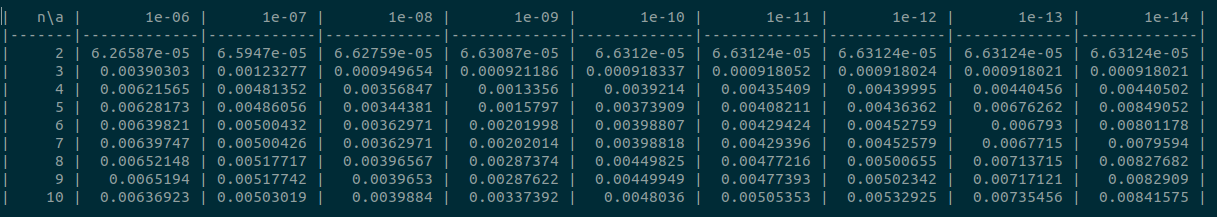

Посмотрим на индекс минимального элемента таблицы. Таким образом, наименьшая погрешность достигается при числе полиномов Лежандра $n=2$ и параметре  **a = 1e-6**, и именно они являются оптимальными параметрами для данной задачи.

Сама погрешность:

In [12]:
ind = np.unravel_index(np.argmin(ans, axis=None), ans.shape)
ans[ind]

6.26587408136814e-05

Теперь посмотрим на задачу с переменным искомым решением

Пусть $z(s) = s + 1$ - для простоты вычисления интеграла

In [13]:
def u_new(x):
    return -x * np.log(x + 2) + x * np.log(x + 1) + 1

Построим таблицу

In [14]:
N = 9
new_ans = np.zeros((N,N+1))
for i in range(N):
    new_ans[i,0] = i+2
headers = [r'n\a']
for j in range(6,6+N):
    headers.append(10**(-j))
for i in range(0,N):
    for j in range(6,6+N):
        solution = build_solution(i+1,10**(-j), u_new)
        new_ans[i,j-5] = norm(lambda x: solution(x)-1)
        
new_table = tabulate(new_ans,headers=headers,
               tablefmt='github',numalign="right")
with open('result4new.txt','w') as file:
    file.write(new_table)      

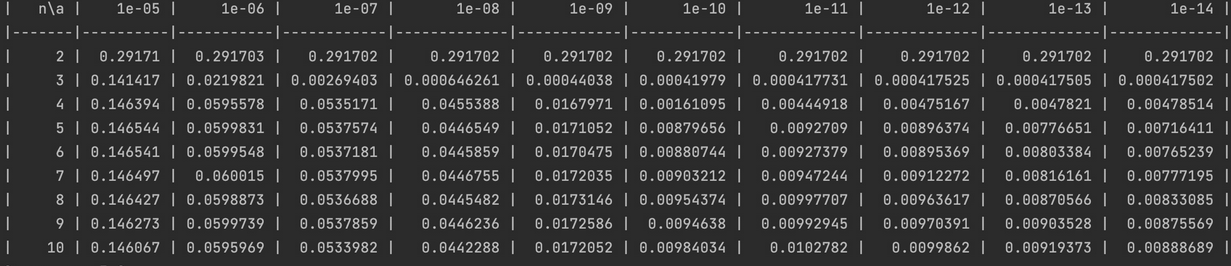

Посмотрим на индекс минимального элемента таблицы. Таким образом, наименьшая погрешность достигается при числе полиномов Лежандра $n=3$ и параметре  **a = 1e-14**, и именно они являются оптимальными параметрами для данной задачи. Сама погрешность равна **0.000417502**